In [ ]:
import pandas as pd

# Specify the file path
file_path = r"C:\Users\DELL\Downloads\Bird_Monitoring_Data_FOREST.XLSX"

# Read all sheets into a dictionary of DataFrames
data = pd.read_excel(file_path, sheet_name=None)

# Combine all DataFrames into one
df = pd.concat(data.values(), ignore_index=True)

# Display the first few rows of the combined DataFrame
print(df)

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

In [37]:
df.Distance.isnull().sum()

np.int64(92)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data=df,x="Distance")
plt.title("Distance")
plt.xlabel("Distance")
plt.show()

In [3]:
m = df["Distance"].mode()[0]  # Get the mode (most frequent value) of the 'Distance' column
df["Distance"] = df["Distance"].fillna(m)  # Use assignment to fill NaN values with the mode


In [4]:
df.isnull().sum()

Admin_Unit_Code                   0
Sub_Unit_Code                  7824
Site_Name                         0
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         1
Distance                          0
Flyover_Observed                  0
Sex                            5183
Common_Name                       0
Scientific_Name                   0
AcceptedTSN                       9
NPSTaxonCode                      0
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                              0
Disturbance                 

In [40]:
df.Sex.isnull().sum()


np.int64(5183)

In [41]:
df.Sex

0       Undetermined
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
8541             NaN
8542    Undetermined
8543             NaN
8544             NaN
8545             NaN
Name: Sex, Length: 8546, dtype: object

In [5]:
df["Sex"]=df["Sex"].fillna("undetermined")

In [6]:
df.Sex.isnull().sum()

np.int64(0)

In [44]:
df.dtypes

Admin_Unit_Code                        object
Sub_Unit_Code                          object
Site_Name                              object
Plot_Name                              object
Location_Type                          object
Year                                    int64
Date                           datetime64[ns]
Start_Time                             object
End_Time                               object
Observer                               object
Visit                                   int64
Interval_Length                        object
ID_Method                              object
Distance                               object
Flyover_Observed                         bool
Sex                                    object
Common_Name                            object
Scientific_Name                        object
AcceptedTSN                           float64
NPSTaxonCode                            int64
AOU_Code                               object
PIF_Watchlist_Status              

<Figure size 1000x600 with 0 Axes>

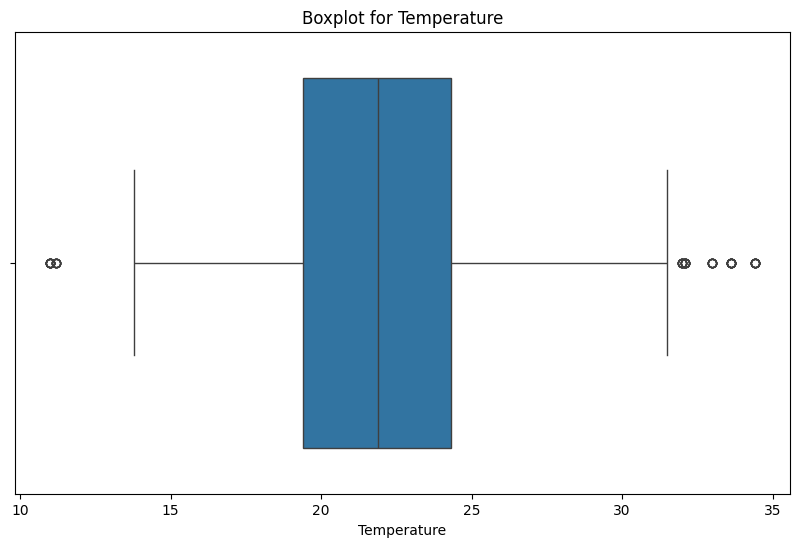

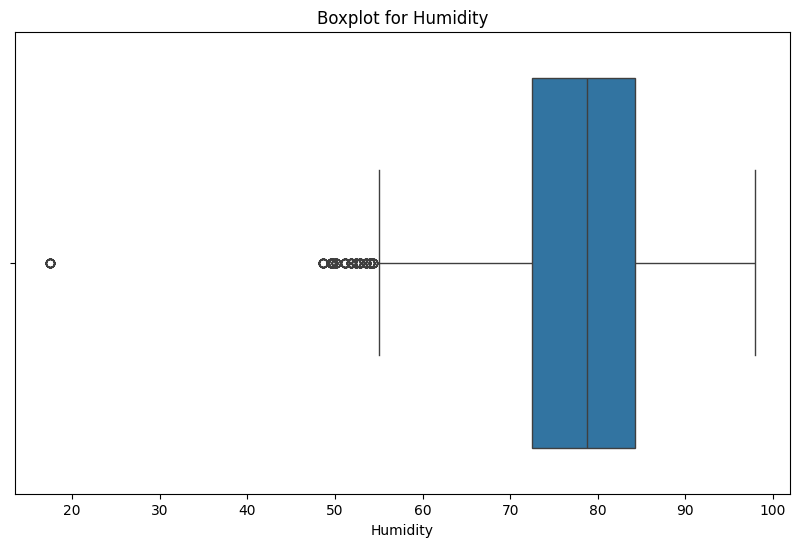

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to check for outliers
numeric_columns = [ 'Temperature', 'Humidity']

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create boxplots for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [56]:
df["Humidity"].max()
df["Humidity"].min()


np.float64(17.5)

In [57]:
df["Temperature"].max()
df["Temperature"].min()

np.float64(11.0)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Example DataFrame
data = df
df = pd.DataFrame(data)

# Step 1: Create a copy of the original columns to keep intact
df['Temperature_clean'] = df['Temperature']
df['Humidity_clean'] = df['Humidity']

# Step 2: Identifying and removing outliers from 'Temperature_clean' using IQR
Q1_temp = df['Temperature_clean'].quantile(0.25)
Q3_temp = df['Temperature_clean'].quantile(0.75)
IQR_temp = Q3_temp - Q1_temp
lower_temp = Q1_temp - 1.5 * IQR_temp
upper_temp = Q3_temp + 1.5 * IQR_temp

# Remove outliers in 'Temperature_clean'
df['Temperature_clean'] = df['Temperature_clean'].apply(lambda x: x if lower_temp <= x <= upper_temp else np.nan)

# Step 3: Identifying and removing outliers from 'Humidity_clean' using IQR
Q1_humid = df['Humidity_clean'].quantile(0.25)
Q3_humid = df['Humidity_clean'].quantile(0.75)
IQR_humid = Q3_humid - Q1_humid
lower_humid = Q1_humid - 1.5 * IQR_humid
upper_humid = Q3_humid + 1.5 * IQR_humid

# Remove outliers in 'Humidity_clean'
df['Humidity_clean'] = df['Humidity_clean'].apply(lambda x: x if lower_humid <= x <= upper_humid else np.nan)

# Show the DataFrame with original and cleaned columns
print(df)


In [ ]:
df.columns

<Figure size 1000x600 with 0 Axes>

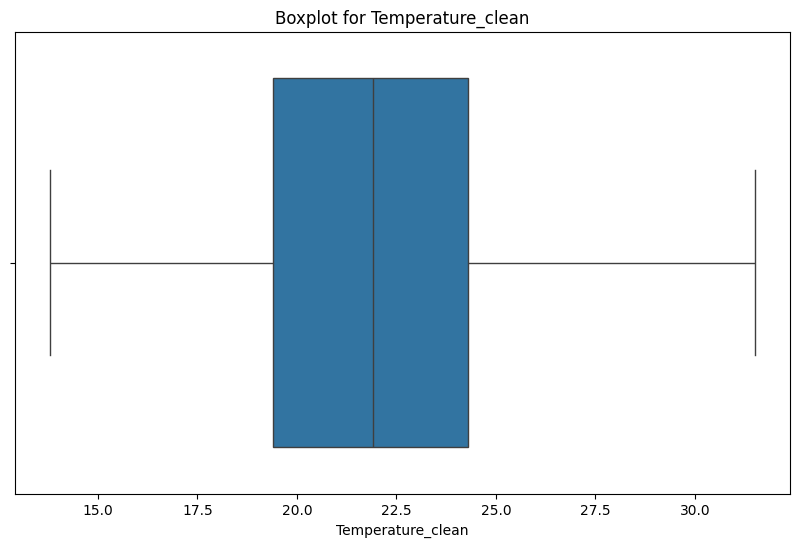

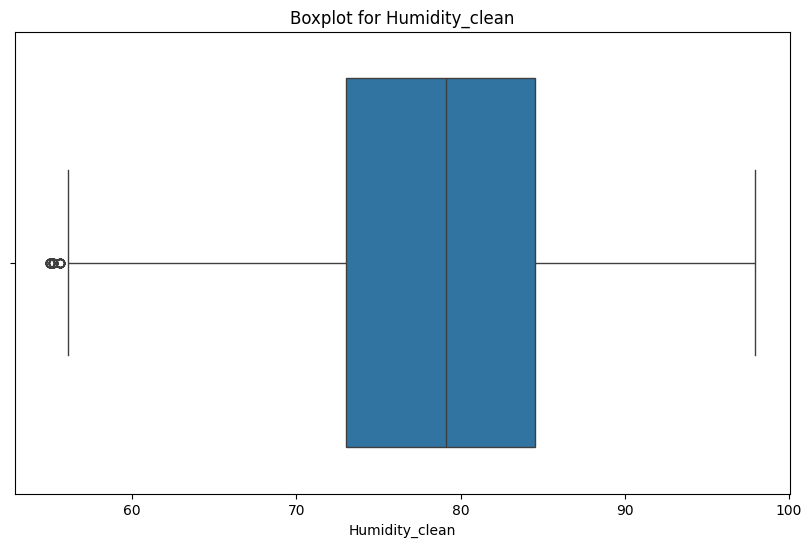

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to check for outliers
numeric_columns = [ 'Temperature_clean', 'Humidity_clean']

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create boxplots for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [10]:
Q1_humid = df['Humidity_clean'].quantile(0.25)
Q3_humid = df['Humidity_clean'].quantile(0.75)
IQR_humid = Q3_humid - Q1_humid
lower_humid = Q1_humid - 1.5 * IQR_humid
upper_humid = Q3_humid + 1.5 * IQR_humid

# Remove outliers in 'Humidity_clean'
df['Humidity_clean'] = df['Humidity_clean'].apply(lambda x: x if lower_humid <= x <= upper_humid else np.nan)

<Figure size 1000x600 with 0 Axes>

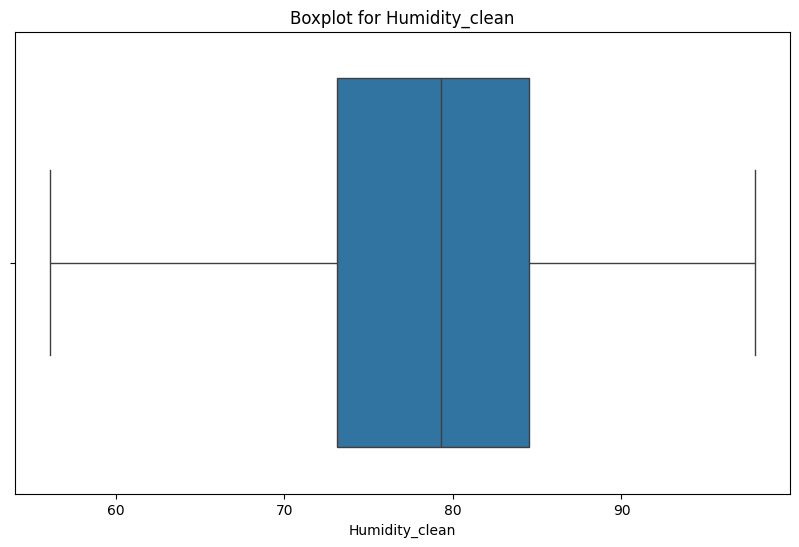

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to check for outliers
numeric_columns = [ 'Humidity_clean']

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create boxplots for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [ ]:
df.columns

In [ ]:
df.tail(30)

In [15]:
import pandas as pd

# Assuming 'df' is your cleaned DataFrame

# Save the cleaned DataFrame to a new Excel file
df.to_excel('cleaned_data.xlsx', index=False)

In [16]:
import os
print(os.getcwd())


d:\Tennis Analysis
